# Ploting the zonal stats for the coastal watersheds and Stream Watersheds

# Required Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Inputs

In [7]:
# Define the base paths
base_path = r'D:\Users\abolmaal\Arcgis\NASAOceanProject'
# out path
outDb = os.path.join(base_path, 'ZonalStats')
# path to zonal stats files
# zonal stats path for Stream watersheds
outStreamWatershed = os.path.join(outDb, 'DirectTNTP_StreamWatresheds.csv')

# outnames to save the zonal stats for the coastal watersheds
outCoastalWatershed_avg = os.path.join(outDb, 'DirectTNTP_CoastalWatershed_avg_new.csv')
outCoastalWatershed_low = os.path.join(outDb, 'DirectTNTP_CoastalWatershed_low_new.csv')
outCoastalWatershed_high = os.path.join(outDb, 'DirectTNTP_CoastalWatershed_high_new.csv')
outCoastalWatershed_surge = os.path.join(outDb, 'DirectTNTP_CoastalWatershed_surge_new.csv')

In [8]:
# fields to read from the csv files
# Direct delivery to Stream Watersheds
StreamDirectTN_converted = 'StreamDirectTN_kgday'
StreamDirectTP_converted = 'StreamDirectTP_kgday'

# Direct delivery to Coastal Watersheds
CoastalDirectTN_avg_convert = 'CoastalWatershedDirectTN_avg_grm2yr'
CoastalDirectTP_avg_convert = 'CoastalWatershedDirectTP_avg_grm2yr'
CoastalDirectTN_low_convert = 'CoastalWatershedDirectTN_low_grm2yr'
CoastalDirectTP_low_convert = 'CoastalWatershedDirectTP_low_grm2yr'
CoastalDirectTN_high_convert = 'CoastalWatershedDirectTN_high_grm2yr'
CoastalDirectTP_high_convert = 'CoastalWatershedDirectTP_high_grm2yr'
CoastalDirectTN_surge_convert = 'CoastalWatershedDirectTN_surge_grm2yr'
CoastalDirectTP_surge_convert = 'CoastalWatershedDirectTP_surge_grm2yr'

## Plot Direct Nutrient Load

### Direct Load to StreamWatershed

In [11]:
def plot_stream_nutrient_load():
    # Read the Stream Watersheds data
    stream_data = pd.read_csv(outStreamWatershed)

    # Extract data for plotting
    tn_values = stream_data[StreamDirectTN_converted]
    tp_values = stream_data[StreamDirectTP_converted]

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Histogram for TN (log scale)
    sns.histplot(tn_values, ax=axes[0], color='blue', kde=True, bins=30, log_scale=(True, False))
    axes[0].axvline(tn_values.min(), color='black', linestyle='--', label=f"Min: {tn_values.min():.2e}")
    axes[0].axvline(tn_values.max(), color='red', linestyle='--', label=f"Max: {tn_values.max():.2e}")
    axes[0].set_title('Direct TN Load StreamWatersheds (log scale)')
    axes[0].set_xlabel('TN Load (kg/day, log scale)')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    # Histogram for TP (log scale)
    sns.histplot(tp_values, ax=axes[1], color='orange', kde=True, bins=30, log_scale=(True, False))
    axes[1].axvline(tp_values.min(), color='black', linestyle='--', label=f"Min: {tp_values.min():.2e}")
    axes[1].axvline(tp_values.max(), color='red', linestyle='--', label=f"Max: {tp_values.max():.2e}")
    axes[1].set_title('Direct TP Load StreamWatersheds (log scale)')
    axes[1].set_xlabel('TP Load (kg/day, log scale)')
    axes[1].legend()

    # Layout
    plt.tight_layout()
    plt.show()

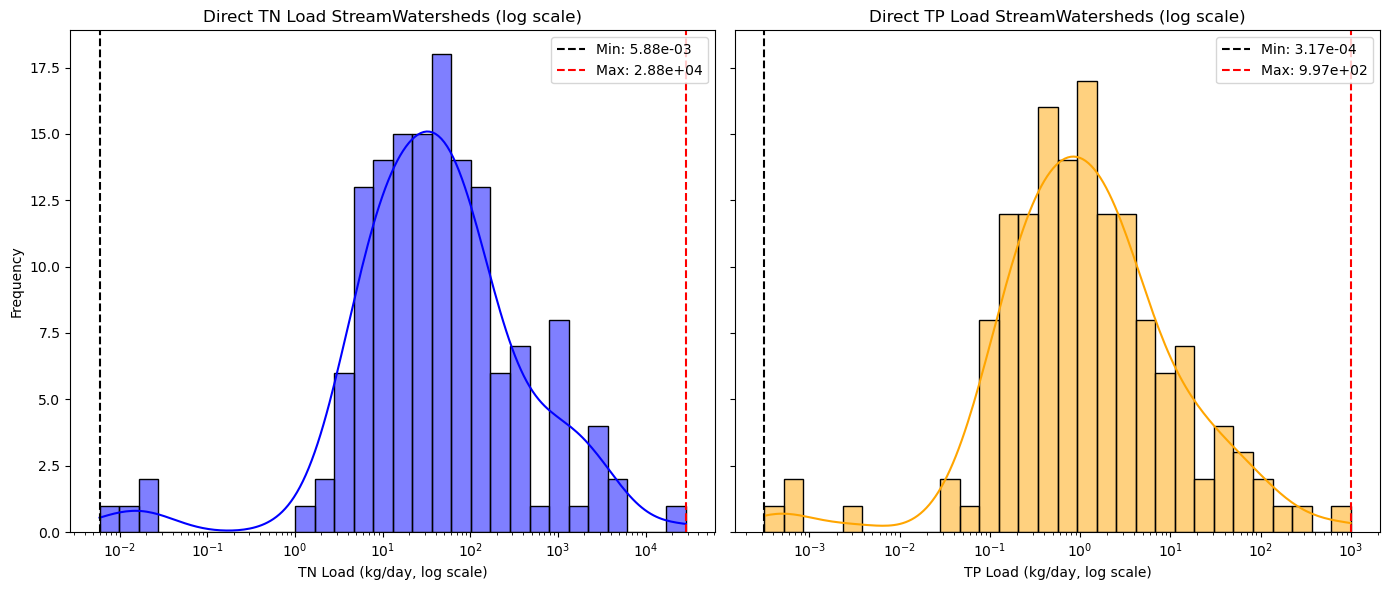

In [12]:
plot_stream_nutrient_load()

## Direct Load to Coastal watersheds


In [13]:
def plot_coastal_nutrient_delivery_tn_tp_colored():
    # Load CSVs
    df_avg = pd.read_csv(outCoastalWatershed_avg)
    df_low = pd.read_csv(outCoastalWatershed_low)
    df_high = pd.read_csv(outCoastalWatershed_high)
    df_surge = pd.read_csv(outCoastalWatershed_surge)

    # Column names
    tn_cols = {
        'TN - Avg': df_avg['CoastalWatershedDirectTN_avg_grm2yr'],
        'TN - Low': df_low['CoastalWatershedDirectTN_low_grm2yr'],
        'TN - High': df_high['CoastalWatershedDirectTN_high_grm2yr'],
        'TN - Surge': df_surge['CoastalWatershedDirectTN_surge_grm2yr']
    }

    tp_cols = {
        'TP - Avg': df_avg['CoastalWatershedDirectTP_avg_grm2yr'],
        'TP - Low': df_low['CoastalWatershedDirectTP_low_grm2yr'],
        'TP - High': df_high['CoastalWatershedDirectTP_high_grm2yr'],
        'TP - Surge': df_surge['CoastalWatershedDirectTP_surge_grm2yr']
    }

    # Create side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    # --- Plot TN Scenarios ---
    for label, series in tn_cols.items():
        series_clean = series.dropna()
        sns.histplot(series_clean, ax=axes[0], kde=True, bins=30, log_scale=(True, False), label=label, alpha=0.5)
        axes[0].axvline(series_clean.min(), color='black', linestyle='--', linewidth=1)
        axes[0].axvline(series_clean.max(), color='red', linestyle='--', linewidth=1)

    axes[0].set_title('Direct TN Load to Coastal Watersheds (Log Scale)')
    axes[0].set_xlabel('TN Load (g/m²/yr)')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    # --- Plot TP Scenarios ---
    for label, series in tp_cols.items():
        series_clean = series.dropna()
        sns.histplot(series_clean, ax=axes[1], kde=True, bins=30, log_scale=(True, False), label=label, alpha=0.5)
        axes[1].axvline(series_clean.min(), color='black', linestyle='--', linewidth=1)
        axes[1].axvline(series_clean.max(), color='red', linestyle='--', linewidth=1)

    axes[1].set_title('Direct TP Load to Coastal Watersheds (Log Scale)')
    axes[1].set_xlabel('TP Load (g/m²/yr)')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

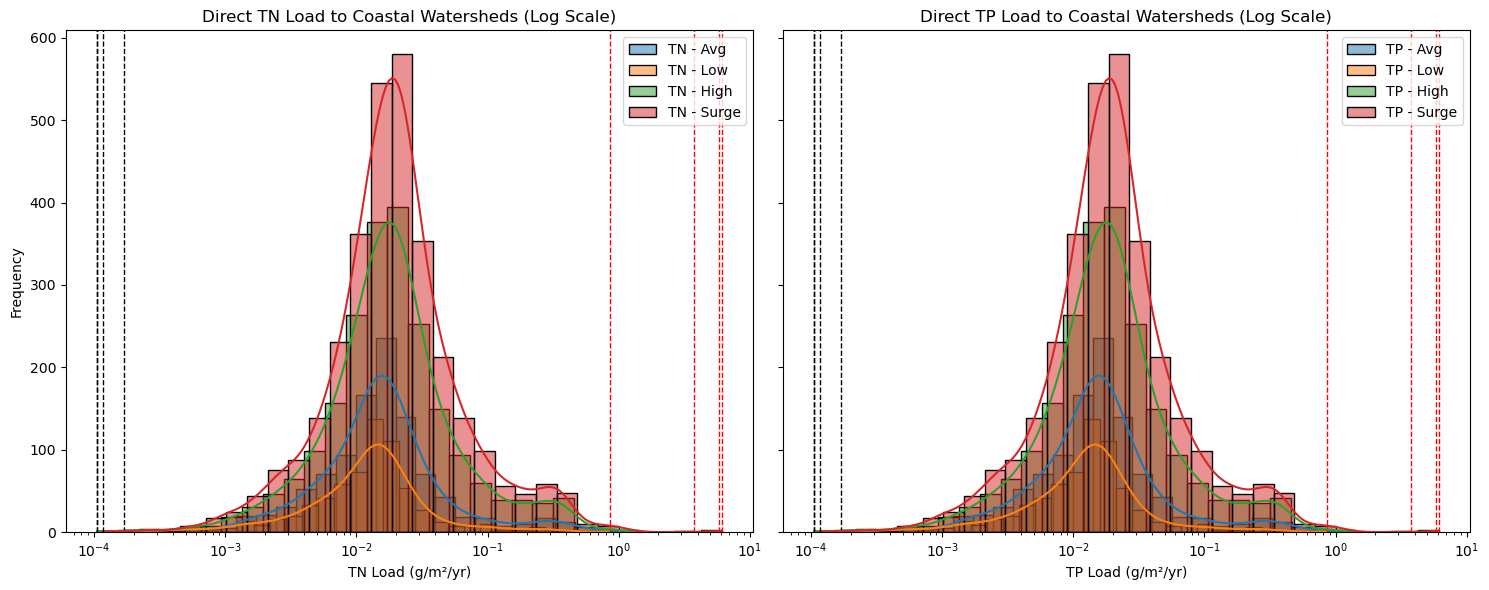

In [14]:
plot_coastal_nutrient_delivery_tn_tp_colored()


In [ ]:
# read the CVS file
TotalLOad = r'D:\Users\abolmaal\Arcgis\NASAOceanProject\ZonalStats\CoastalWatershed_total_N_P_avg._directandIndirect.csv'

df = pd.read_csv(TotalLOad)
# drop TotaTP and TotalTN columns
df = df.drop(columns=['TotalTP', 'TotalTn'])

In [ ]:
# calcaulate the total load
df['TotalLoadTN_grm2yr'] = df['StreamDirectTN_grm2yr'] + df['InDirectCWTN_grm2yr']

In [ ]:
df['TotalLoadTP_grm2yr'] = df['StreamDirectTP_grm2yr'] + df['InDirectCWTP_grm2yr']

In [ ]:
# show the min and max values of StreamDirectTN_grm2yr and StreamDirectTP_grm2yr
print("StreamDirectTN_grm2yr min:", df['StreamDirectTN_grm2yr'].min())
print("StreamDirectTN_grm2yr max:", df['StreamDirectTN_grm2yr'].max())


In [ ]:
import matplotlib.pyplot as plt

# Get min and max for legends
tn_min = df['TotalLoadTN_grm2yr'].min()
tn_max = df['TotalLoadTN_grm2yr'].max()

tp_min = df['TotalLoadTP_grm2yr'].min()
tp_max = df['TotalLoadTP_grm2yr'].max()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=False, sharey=False)

# Plot TN
ax1.scatter(df.index, df['TotalLoadTN_grm2yr'], color='Green', alpha=0.6)
ax1.set_title('Total Load TN')
ax1.set_xlabel('Index')
ax1.set_ylabel('TN Load (g/m²/yr)')
ax1.legend([f'Min: {tn_min:.2f}, Max: {tn_max:.2f}'])

# Plot TP
ax2.scatter(df.index, df['TotalLoadTP_grm2yr'], color='blue', alpha=0.6)
ax2.set_title('Total Load TP')
ax2.set_xlabel('Index')
ax2.set_ylabel('TP Load (g/m²/yr)')
ax2.legend([f'Min: {tp_min:.2f}, Max: {tp_max:.2f}'])

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# TN
ax1.bar(df['Coastal_id'], df['TotalLoadTN_grm2yr'], color='red')
ax1.set_yscale('log')
ax1.set_title('Total Load TN (log scale)')
ax1.set_xlabel('Coastal ID')
ax1.set_ylabel('TN Load (g/m²/yr)')

# TP
ax2.bar(df['Coastal_id'], df['TotalLoadTP_grm2yr'], color='blue')
ax2.set_yscale('log')
ax2.set_title('Total Load TP (log scale)')
ax2.set_xlabel('Coastal ID')
ax2.set_ylabel('TP Load (g/m²/yr)')

plt.tight_layout()
plt.show()

